**Trabalho de Aula**  
**Applied Statistics**  
**2025 - MBA DSA_32**  

**Nome:** Bruno Silva Guimarães  
**RA:** 1510360  
**E-mail:** bruno.sguimaraes@aluno.faculdadeimpacta.com.br

**Nome:** Lucas Lopes dos Santos  
**RA:** 1201569  
**E-mail:** lucas.1201569@aluno.faculdadeimpacta.com.br

**Lista 3**

**1. Variáveis categóricas e níveis de medida**  
No dataset NHANES, identifique uma variável categórica nominal e outra ordinal.  
Em seguida, gere uma tabela de contingência entre elas e produza um gráfico de barras que represente a relação entre as categorias escolhidas.

**2. Tendência central em variáveis assimétricas**  
Escolha uma variável contínua com alta assimetria à direita no dataset NHANES (por exemplo: IMC ou circunferência da cintura).  
Calcule média, mediana e moda, plote o histograma da variável e explique visualmente qual delas representa melhor os dados.  


**3. Aplicação de Min-Max e Z-score**  
Usando a variável BMXBMI (IMC):  

+ Aplique MinMax e Z-score e plote, em gráficos separados, as distribuições resultantes.  
+ Explique como as transformações alteram (ou não) a forma da distribuição, conforme discutido nos slides de transformações de escala.  


**4. Distribuição Binomial no NHANES**  
Escolha uma variável do NHANES que seja binária após limpeza (ex.: "Já fumou 100 cigarros" = SMQ020).  
Calcule a probabilidade empírica p̂ (proporção de “1”).  
Em seguida, gere e plote a PMF da Binomial(n=100, p=p̂) e compare visualmente com uma Poisson com λ = n·p̂, como apresentado nos slides.  


**5. Distribuição Normal vs. Log-Normal**  
Selecione uma variável contínua positiva do NHANES com cauda longa à direita (ex.: colesterol, triglicerídeos, renda). 

Mostre em dois gráficos:  

+ Histograma original com média, mediana e moda.  
+ Histograma do log-transform da mesma variável.  
+ Explique como a transformação logarítmica aproxima a distribuição de uma normal, conforme discutido nos slides (páginas 86–89).

In [12]:
# Carregando as bibliotecas

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [32]:
# Carregando a base
url = 'https://raw.githubusercontent.com/llucas-llopes/applied_statistics/main/nhanes_2015_2016.csv'
df = pd.read_csv(url, sep=",")
df.head()

,ID_Participante,ConsumiuAlcool12Meses,FrequenciaConsumoAlcool,QuantidadeBebida,JaFumou100Cigarros,Sexo,Idade,RacaEtnia,Cidadania,Escolaridade,...,PressaoSistolica_2,PressaoDiastolica_2,Peso_kg,Altura_cm,IMC,ComprimentoPerna,ComprimentoBraco,CircunferenciaBraco,CircunferenciaCintura,PossuiPlanoSaude
0,83732,1.0,NaN,1.0,1,1,62,3,1.0,5.0,...,124.0,64.0,94.8,184.5,27.8,43.3,43.6,35.9,101.1,2.0
1,83733,1.0,NaN,6.0,1,1,53,3,2.0,3.0,...,140.0,88.0,90.4,171.4,30.8,38.0,40.0,33.2,107.9,NaN
2,83734,1.0,NaN,NaN,1,1,78,3,1.0,3.0,...,132.0,44.0,83.4,170.1,28.8,35.6,37.0,31.0,116.5,2.0
3,83735,2.0,1.0,1.0,2,2,56,3,1.0,5.0,...,134.0,68.0,109.8,160.9,42.4,38.5,37.7,38.3,110.1,2.0
4,83736,2.0,1.0,1.0,2,2,42,4,1.0,4.0,...,114.0,54.0,55.2,164.9,20.3,37.4,36.0,27.2,80.4,2.0


In [33]:
# Removendo campos nulos (NaN) da base
df_tratada = df.dropna()
df_tratada.head()

,ID_Participante,ConsumiuAlcool12Meses,FrequenciaConsumoAlcool,QuantidadeBebida,JaFumou100Cigarros,Sexo,Idade,RacaEtnia,Cidadania,Escolaridade,...,PressaoSistolica_2,PressaoDiastolica_2,Peso_kg,Altura_cm,IMC,ComprimentoPerna,ComprimentoBraco,CircunferenciaBraco,CircunferenciaCintura,PossuiPlanoSaude
3,83735,2.0,1.0,1.0,2,2,56,3,1.0,5.0,...,134.0,68.0,109.8,160.9,42.4,38.5,37.7,38.3,110.1,2.0
4,83736,2.0,1.0,1.0,2,2,42,4,1.0,4.0,...,114.0,54.0,55.2,164.9,20.3,37.4,36.0,27.2,80.4,2.0
13,83754,2.0,1.0,1.0,2,2,67,2,1.0,5.0,...,116.0,64.0,117.8,164.1,43.7,34.8,38.6,42.7,123.0,2.0
27,83785,2.0,1.0,1.0,1,2,60,2,1.0,5.0,...,136.0,74.0,75.6,145.2,35.9,31.0,33.1,36.0,108.0,2.0
30,83788,2.0,1.0,1.0,1,2,69,3,1.0,4.0,...,148.0,72.0,84.0,164.6,31.0,35.0,35.8,33.0,103.0,2.0


**1. Variáveis categóricas e níveis de medida**

No dataset NHANES, identifique uma variável categórica nominal e outra ordinal.  
Em seguida, gere uma tabela de contingência entre elas e produza um gráfico de barras que represente a relação entre as categorias escolhidas.

In [34]:
# encontrando colunas categóricas e inserindo seus nomes numa lista: data type objeto ou numérico com poucos exclusivos
cat_cols = [ c for c in df_tratada.columns if df_tratada[c].dtype == 'object' or df_tratada[c].nunique() < 10 ]
cat_cols

['ConsumiuAlcool12Meses',
 'FrequenciaConsumoAlcool',
 'QuantidadeBebida',
 'JaFumou100Cigarros',
 'Sexo',
 'RacaEtnia',
 'Cidadania',
 'Escolaridade',
 'EstadoCivil',
 'TamanhoDomicilio',
 'UnidadePrimariaAmostra',
 'PossuiPlanoSaude']

In [35]:
amostra = df_tratada['Escolaridade'].sample(n=10, random_state=42)
print(amostra)

1347    3.0
875     4.0
141     3.0
1465    3.0
2970    5.0
2185    5.0
4329    4.0
5043    4.0
2758    1.0
4555    2.0
Name: Escolaridade, dtype: float64


In [36]:
print(df_tratada.dtypes)

ID_Participante              int64
ConsumiuAlcool12Meses      float64
FrequenciaConsumoAlcool    float64
QuantidadeBebida           float64
JaFumou100Cigarros           int64
Sexo                         int64
Idade                        int64
RacaEtnia                    int64
Cidadania                  float64
Escolaridade               float64
EstadoCivil                float64
TamanhoDomicilio             int64
WTINT2YR                   float64
UnidadePrimariaAmostra       int64
SDMVSTRA                     int64
INDFMPIR                   float64
PressaoSistolica_1         float64
PressaoDiastolica_1        float64
PressaoSistolica_2         float64
PressaoDiastolica_2        float64
Peso_kg                    float64
Altura_cm                  float64
IMC                        float64
ComprimentoPerna           float64
ComprimentoBraco           float64
CircunferenciaBraco        float64
CircunferenciaCintura      float64
PossuiPlanoSaude           float64
dtype: object


In [37]:
# 1) Armazenando as colunas categóricas nominais
nominais = df.select_dtypes(include=["int64"])

# 2) Filtro por número máximo de categorias (ajuste o limite)
limite = 20
mask = candidatas.nunique() <= limite

colunas_cat_nominais = candidatas.columns[mask]

print("Colunas possivelmente categóricas nominais:")
print(colunas_cat_nominais)

NameError: name 'candidatas' is not defined

Calcule , plote o histograma da variável e explique visualmente qual delas representa melhor os dados.

77.41935483870968 71.0 24.042703943259497


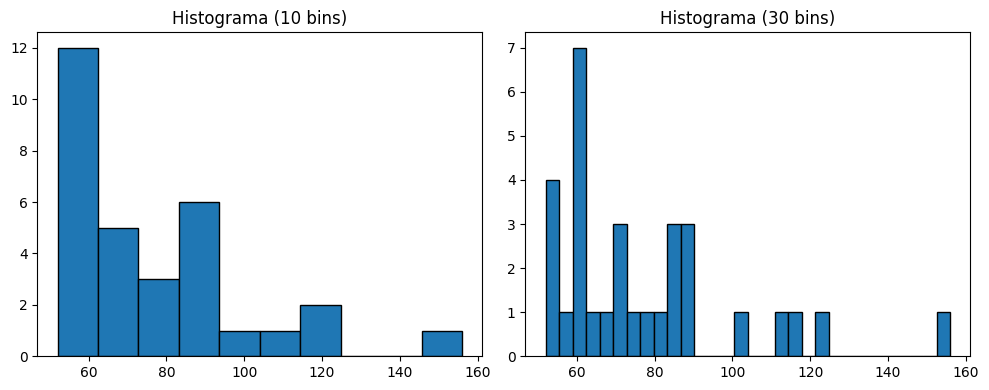

In [55]:
peso = pd.to_numeric(df_tratada["Peso_kg"], errors="coerce").dropna()

print(peso.mean(), peso.median(), peso.std())

fig, axes = plt.subplots(1, 2, figsize=(10,4))

# intervalo de 10 bins
axes[0].hist(peso, bins=10, edgecolor="black")
axes[0].set_title("Histograma (10 bins)")

# intervalo de 30 bins
axes[1].hist(peso, bins=30, edgecolor="black")
axes[1].set_title("Histograma (30 bins)")

plt.tight_layout()
plt.show()

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5735 entries, 0 to 5734
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID_Participante          5735 non-null   int64  
 1   ConsumiuAlcool12Meses    5208 non-null   float64
 2   FrequenciaConsumoAlcool  1731 non-null   float64
 3   QuantidadeBebida         3379 non-null   float64
 4   JaFumou100Cigarros       5735 non-null   int64  
 5   Sexo                     5735 non-null   int64  
 6   Idade                    5735 non-null   int64  
 7   RacaEtnia                5735 non-null   int64  
 8   Cidadania                5734 non-null   float64
 9   Escolaridade             5474 non-null   float64
 10  EstadoCivil              5474 non-null   float64
 11  TamanhoDomicilio         5735 non-null   int64  
 12  WTINT2YR                 5735 non-null   float64
 13  UnidadePrimariaAmostra   5735 non-null   int64  
 14  SDMVSTRA                

In [5]:
for c in df.columns:
    print( df[c] )

0       83732
1       83733
2       83734
3       83735
4       83736
        ...  
5730    93695
5731    93696
5732    93697
5733    93700
5734    93702
Name: ID_Participante, Length: 5735, dtype: int64
0       1.0
1       1.0
2       1.0
3       2.0
4       2.0
       ... 
5730    2.0
5731    2.0
5732    1.0
5733    NaN
5734    1.0
Name: ConsumiuAlcool12Meses, Length: 5735, dtype: float64
0       NaN
1       NaN
2       NaN
3       1.0
4       1.0
       ... 
5730    2.0
5731    2.0
5732    NaN
5733    NaN
5734    NaN
Name: FrequenciaConsumoAlcool, Length: 5735, dtype: float64
0       1.0
1       6.0
2       NaN
3       1.0
4       1.0
       ... 
5730    NaN
5731    NaN
5732    1.0
5733    NaN
5734    2.0
Name: QuantidadeBebida, Length: 5735, dtype: float64
0       1
1       1
2       1
3       2
4       2
       ..
5730    1
5731    2
5732    1
5733    1
5734    2
Name: JaFumou100Cigarros, Length: 5735, dtype: int64
0       1
1       1
2       1
3       2
4       2
       ..
5730  

In [5]:
# encontrando colunas categóricas e inserindo seus nomes numa lista: data type objeto ou numérico com poucos exclusivos
cat_cols = [ c for c in df.columns if df[c].dtype == 'object' or df[c].nunique() < 10 ]
cat_cols

['ConsumiuAlcool12Meses',
 'FrequenciaConsumoAlcool',
 'JaFumou100Cigarros',
 'Sexo',
 'RacaEtnia',
 'Cidadania',
 'Escolaridade',
 'EstadoCivil',
 'TamanhoDomicilio',
 'UnidadePrimariaAmostra',
 'PossuiPlanoSaude']

In [6]:
# gerando value_counts para cada coluna de variável categórica
eda = { col: df[col].value_counts(dropna=False) for col in cat_cols }
eda

{'ConsumiuAlcool12Meses': ConsumiuAlcool12Meses
 1.0    3477
 2.0    1728
 NaN     527
 9.0       3
 Name: count, dtype: int64,
 'FrequenciaConsumoAlcool': FrequenciaConsumoAlcool
 NaN    4004
 2.0     979
 1.0     747
 9.0       4
 7.0       1
 Name: count, dtype: int64,
 'JaFumou100Cigarros': JaFumou100Cigarros
 2    3406
 1    2319
 9       8
 7       2
 Name: count, dtype: int64,
 'Sexo': Sexo
 2    2976
 1    2759
 Name: count, dtype: int64,
 'RacaEtnia': RacaEtnia
 3    1839
 4    1227
 1    1018
 5     901
 2     750
 Name: count, dtype: int64,
 'Cidadania': Cidadania
 1.0    4746
 2.0     975
 7.0       8
 9.0       5
 NaN       1
 Name: count, dtype: int64,
 'Escolaridade': Escolaridade
 4.0    1621
 5.0    1366
 3.0    1186
 1.0     655
 2.0     643
 NaN     261
 9.0       3
 Name: count, dtype: int64,
 'EstadoCivil': EstadoCivil
 1.0     2780
 5.0     1004
 3.0      579
 6.0      527
 2.0      396
 NaN      261
 4.0      186
 77.0       2
 Name: count, dtype: int64,
 'Tamanh

In [7]:
df.columns

Index(['ID_Participante', 'ConsumiuAlcool12Meses', 'FrequenciaConsumoAlcool',
       'QuantidadeBebida', 'JaFumou100Cigarros', 'Sexo', 'Idade', 'RacaEtnia',
       'Cidadania', 'Escolaridade', 'EstadoCivil', 'TamanhoDomicilio',
       'WTINT2YR', 'UnidadePrimariaAmostra', 'SDMVSTRA', 'INDFMPIR',
       'PressaoSistolica_1', 'PressaoDiastolica_1', 'PressaoSistolica_2',
       'PressaoDiastolica_2', 'Peso_kg', 'Altura_cm', 'IMC',
       'ComprimentoPerna', 'ComprimentoBraco', 'CircunferenciaBraco',
       'CircunferenciaCintura', 'PossuiPlanoSaude'],
      dtype='object')

In [8]:
# 1. ALQ101 – Consumo de álcool nos últimos 12 meses
df["ConsumiuAlcool12Meses"].value_counts()

ConsumiuAlcool12Meses
1.0    3477
2.0    1728
9.0       3
Name: count, dtype: int64

In [9]:
# 1. ALQ101 – Consumo de álcool nos últimos 12 meses - Normalizado
df["ConsumiuAlcool12Meses"].value_counts(normalize=True)

ConsumiuAlcool12Meses
1.0    0.667627
2.0    0.331797
9.0    0.000576
Name: proportion, dtype: float64

In [10]:
# 1. ALQ101 – Consumo de álcool nos últimos 12 meses - em percentagem
df["ConsumiuAlcool12Meses"].value_counts(normalize=True) * 100

ConsumiuAlcool12Meses
1.0    66.762673
2.0    33.179724
9.0     0.057604
Name: proportion, dtype: float64

In [11]:
# Insights:
# A maioria consumiu álcool no último ano.
# 0.23% não têm informação registrada.

# 2. ALQ110 – Quantidade média por ocasião
df["ConsumiuAlcool12Meses"].value_counts(normalize=True) * 100

ConsumiuAlcool12Meses
1.0    66.762673
2.0    33.179724
9.0     0.057604
Name: proportion, dtype: float64

In [12]:
df.columns

Index(['ID_Participante', 'ConsumiuAlcool12Meses', 'FrequenciaConsumoAlcool',
       'QuantidadeBebida', 'JaFumou100Cigarros', 'Sexo', 'Idade', 'RacaEtnia',
       'Cidadania', 'Escolaridade', 'EstadoCivil', 'TamanhoDomicilio',
       'WTINT2YR', 'UnidadePrimariaAmostra', 'SDMVSTRA', 'INDFMPIR',
       'PressaoSistolica_1', 'PressaoDiastolica_1', 'PressaoSistolica_2',
       'PressaoDiastolica_2', 'Peso_kg', 'Altura_cm', 'IMC',
       'ComprimentoPerna', 'ComprimentoBraco', 'CircunferenciaBraco',
       'CircunferenciaCintura', 'PossuiPlanoSaude'],
      dtype='object')

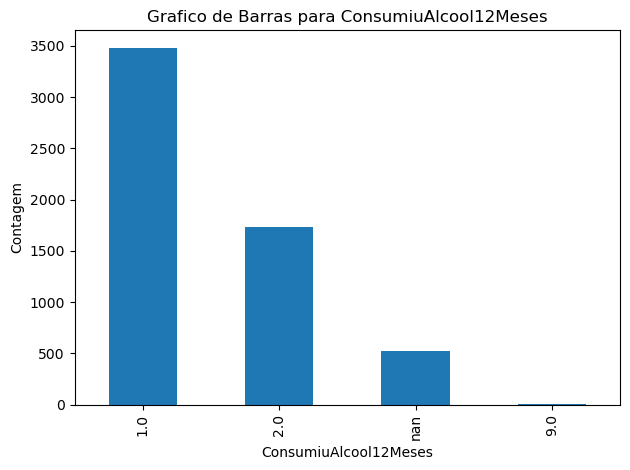

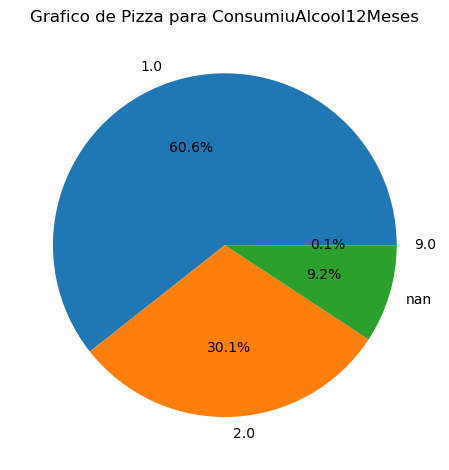

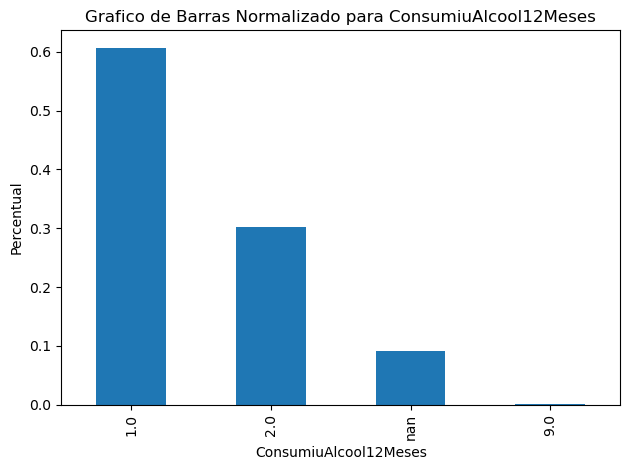

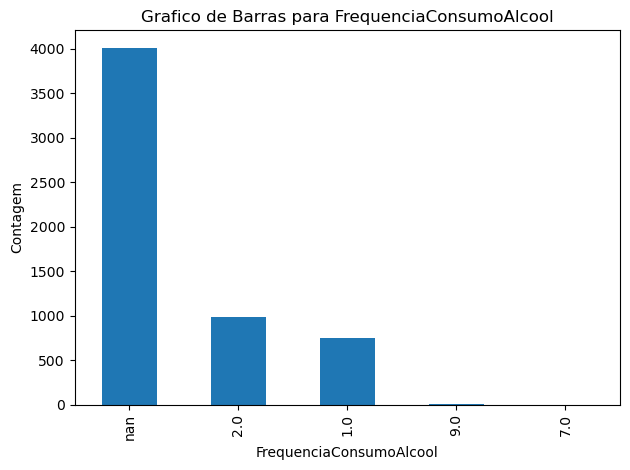

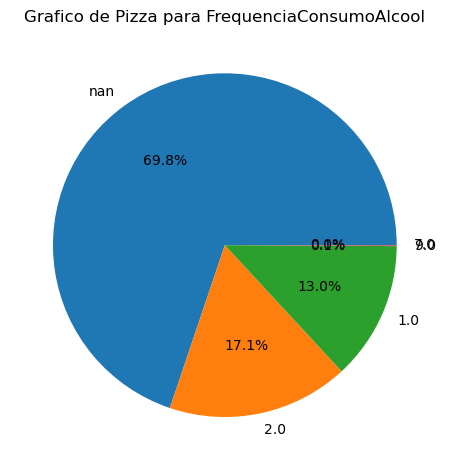

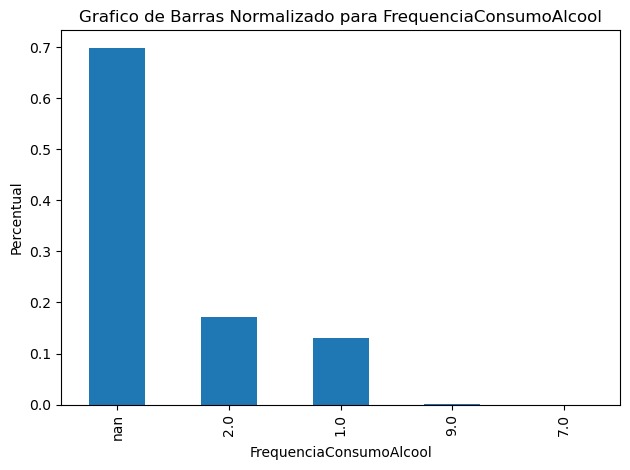

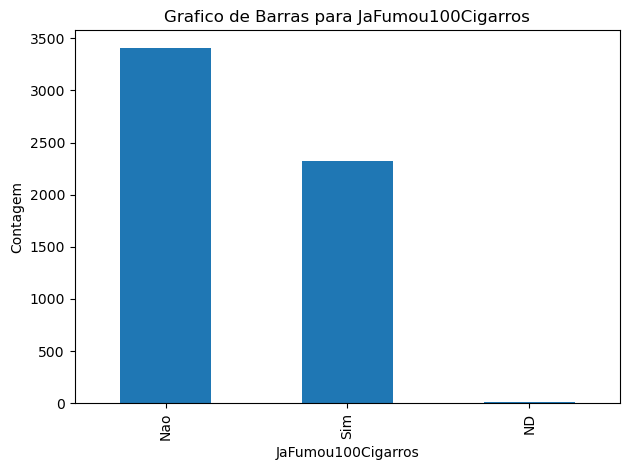

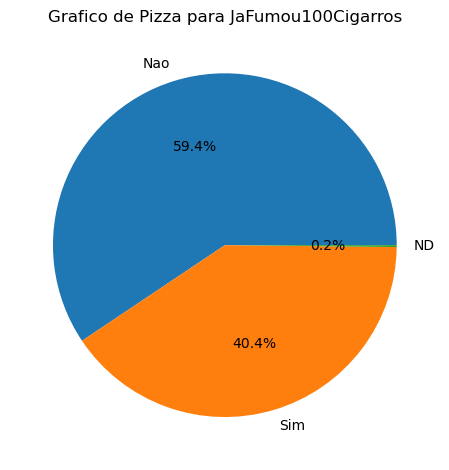

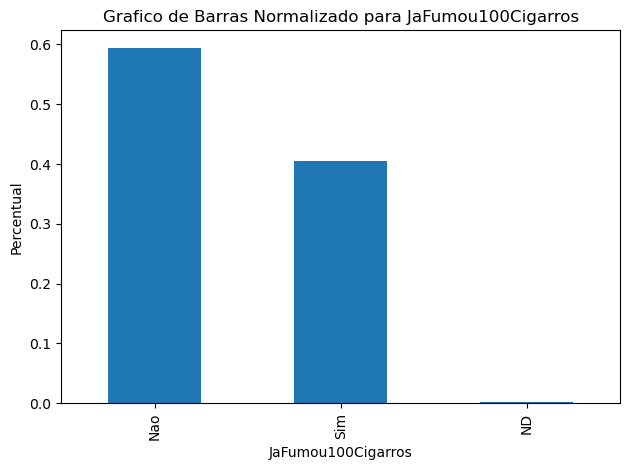

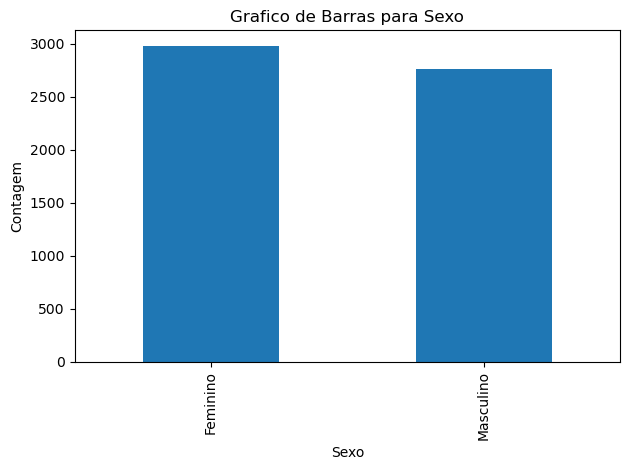

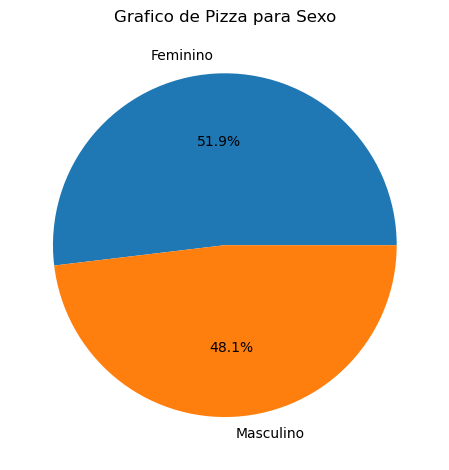

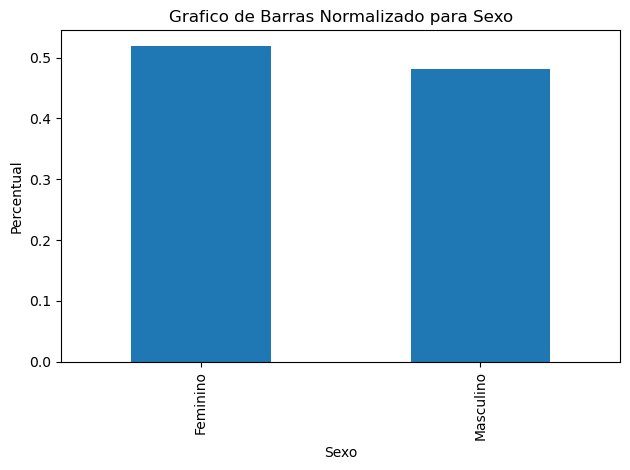

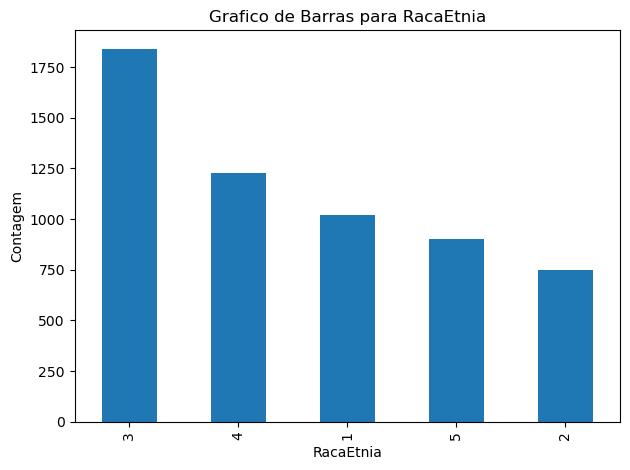

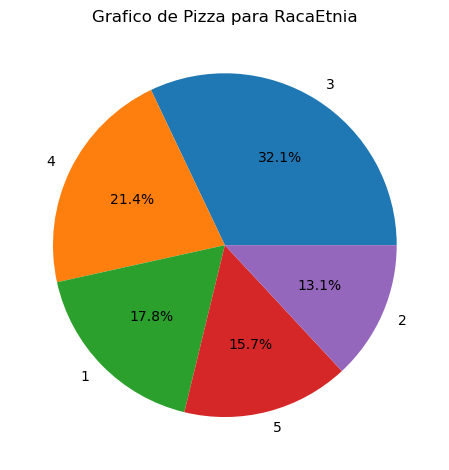

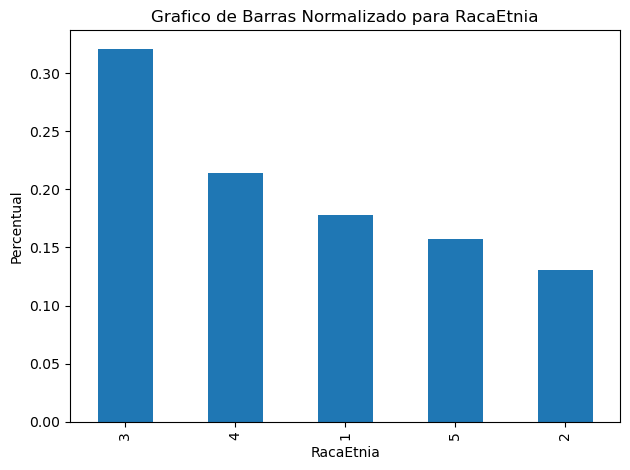

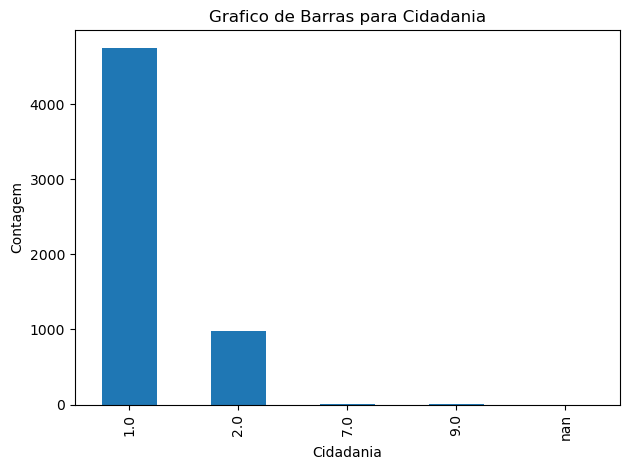

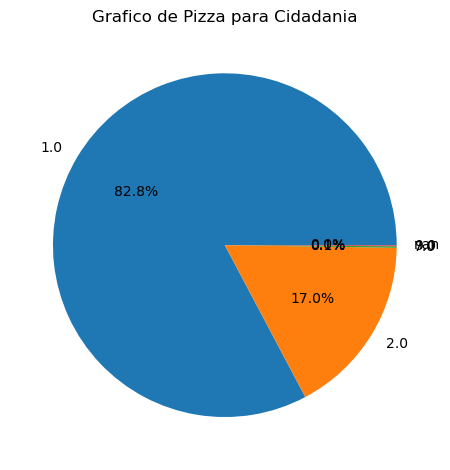

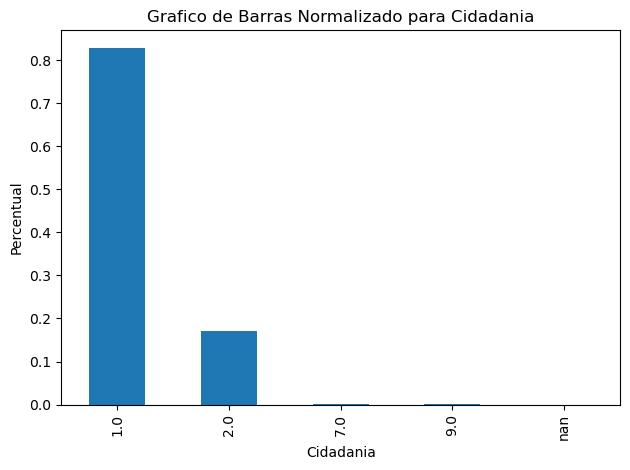

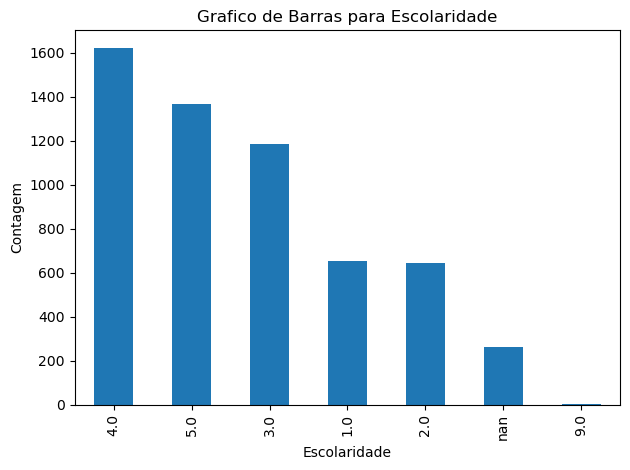

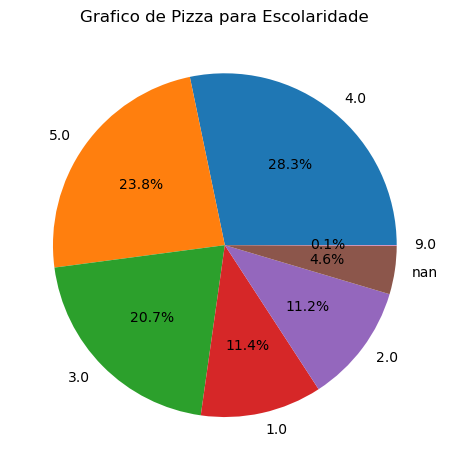

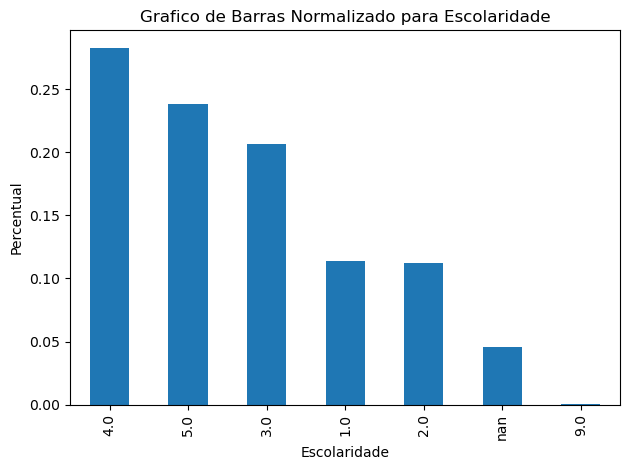

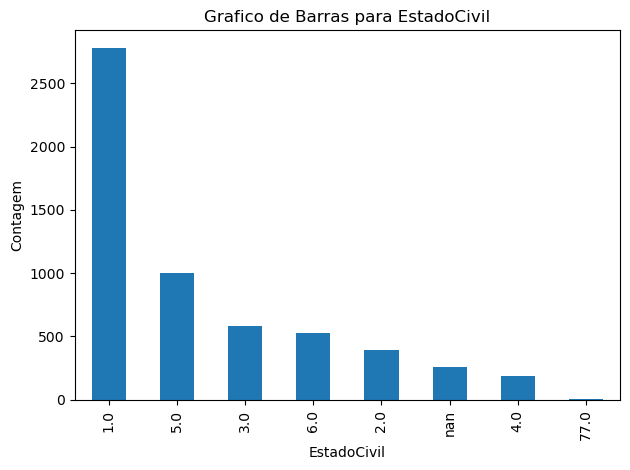

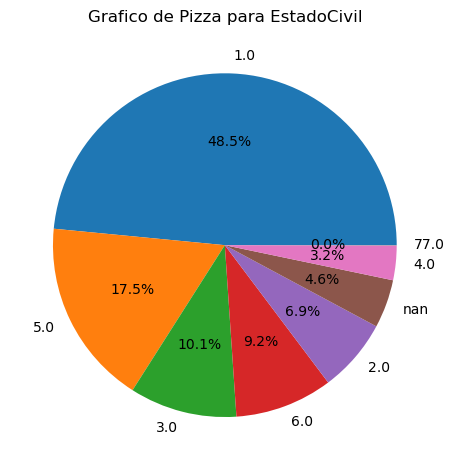

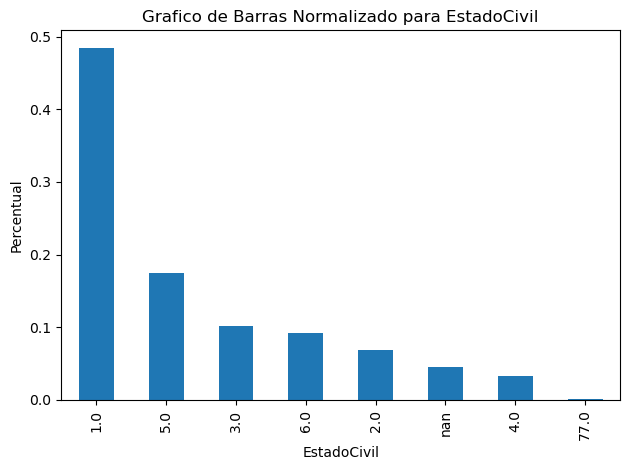

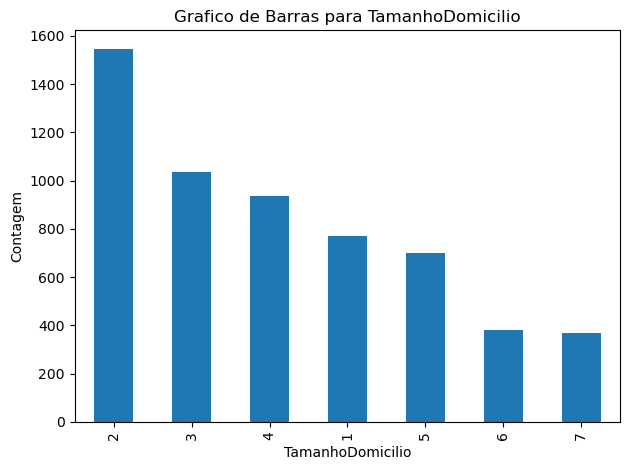

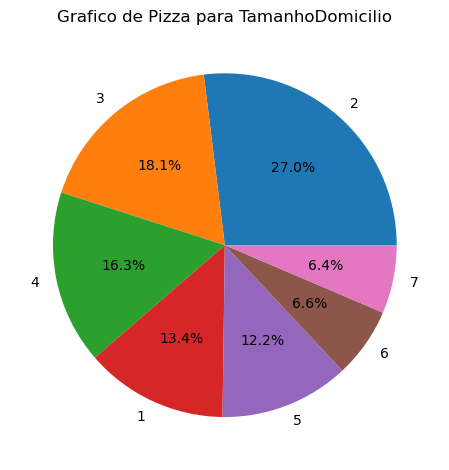

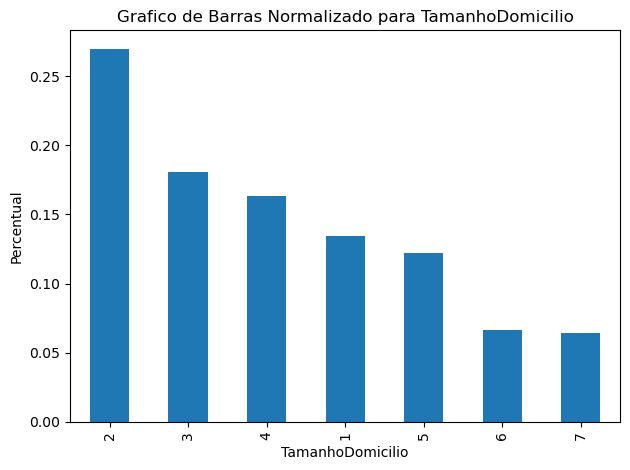

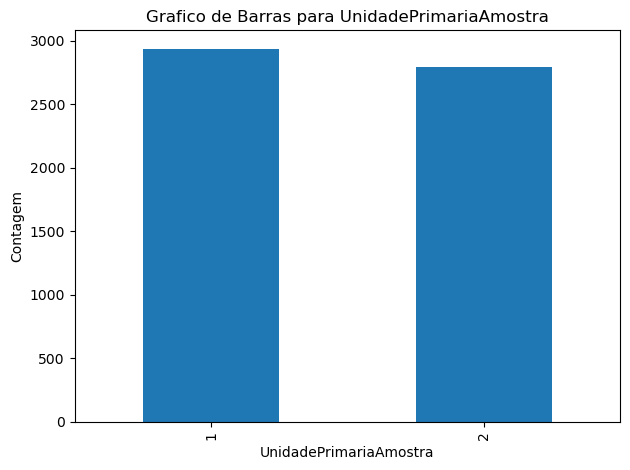

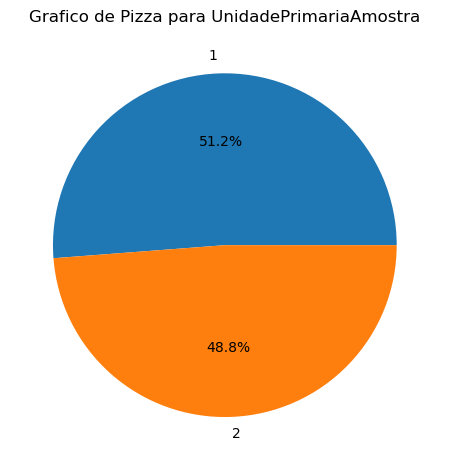

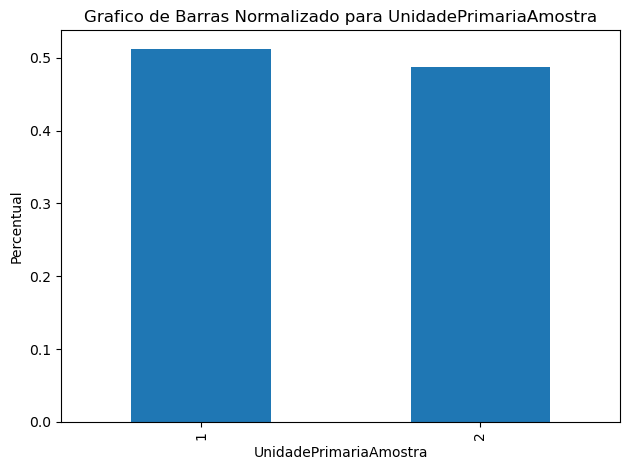

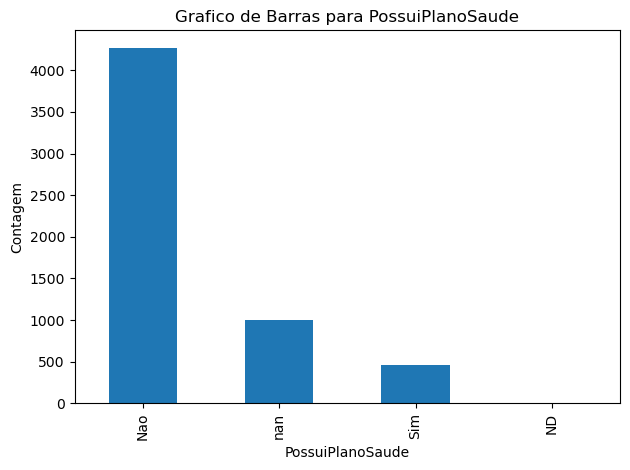

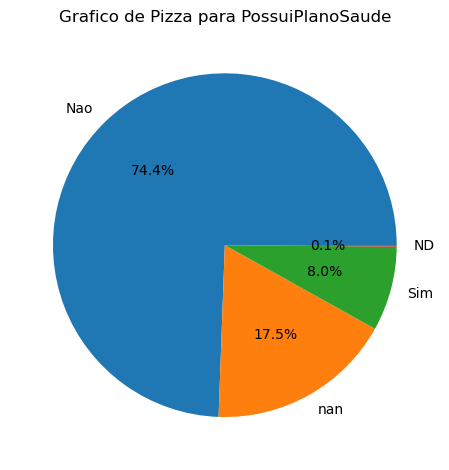

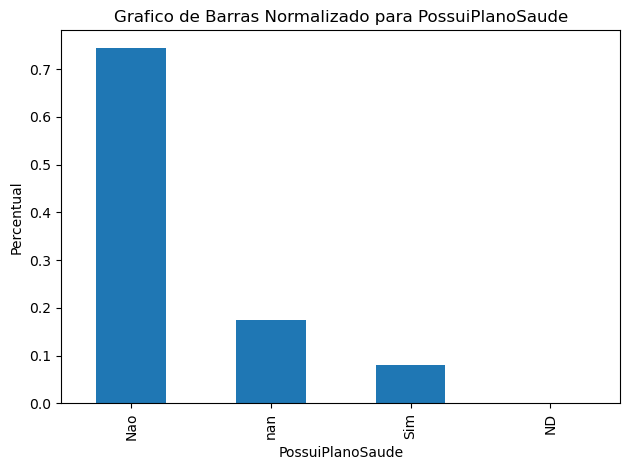

In [13]:
# variáveis categóricas
cat_cols = [c for c in df.columns if df[c].dtype=='object' or df[c].nunique()<10]

# mapeamento de rótulos para alguns códigos conhecidos
label_maps = {
            "Sexo": {1:"Masculino",2:"Feminino"},
            "JaFumou100Cigarros": {1:"Sim",2:"Nao",7:"ND",9:"ND"},
            "PossuiPlanoSaude": {1:"Sim",2:"Nao",9:"ND"},
            }

df_labeled = df.copy()

for col, mp in label_maps.items():
    df_labeled[col] = df_labeled[col].map(mp)

# variável alvo: IMC (exemplo)
target = "IMC"

# gráficos das distribuições categóricas
for col in cat_cols:
    
    vc = df_labeled[col].value_counts(dropna=False)
    
    # gráficos de barras
    plt.figure()
    vc.plot(kind='bar')
    plt.title(f"Grafico de Barras para {col}")
    plt.xlabel(col)
    plt.ylabel("Contagem")
    plt.tight_layout()
    plt.show()
    
    # gráfico de pizza
    plt.figure()
    vc.plot(kind='pie', autopct='%1.1f%%')
    plt.title(f"Grafico de Pizza para {col}")
    plt.ylabel("")
    plt.tight_layout()
    plt.show()

    # gráfico de barras normalizado
    plt.figure()
    (vc/vc.sum()).plot(kind='bar')
    plt.title(f"Grafico de Barras Normalizado para {col}")
    plt.xlabel(col)
    plt.ylabel("Percentual")
    plt.tight_layout()
    plt.show()

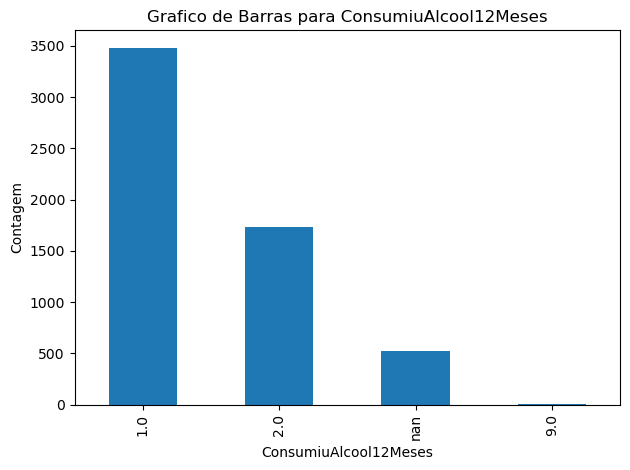

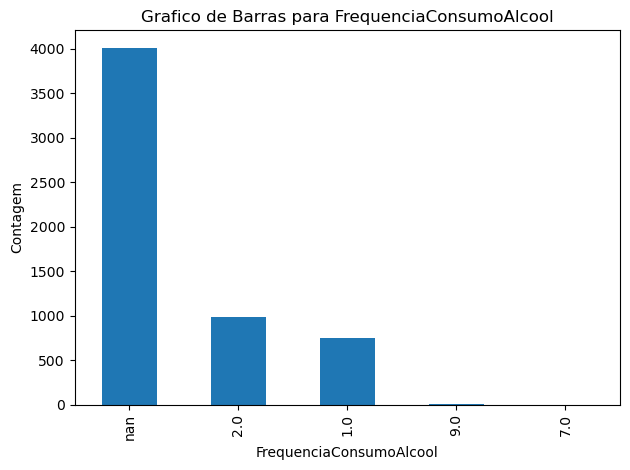

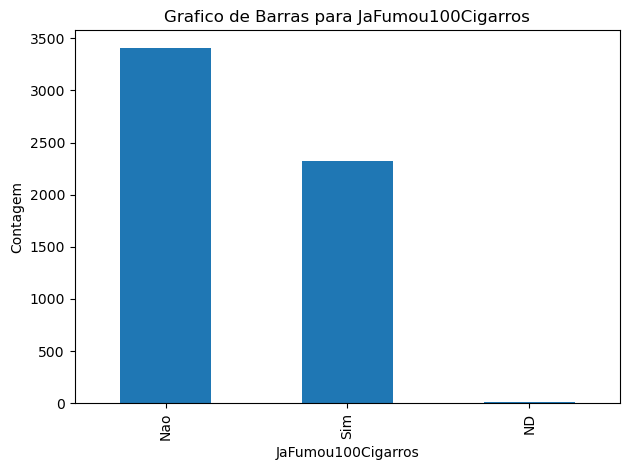

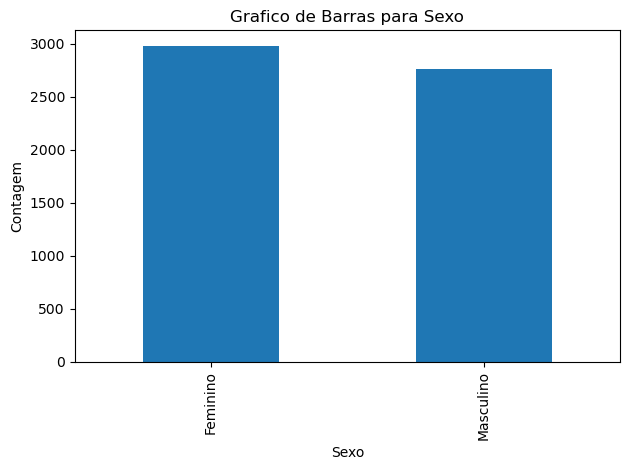

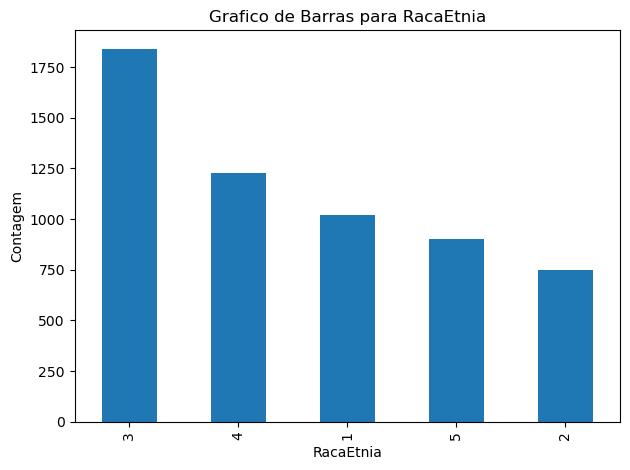

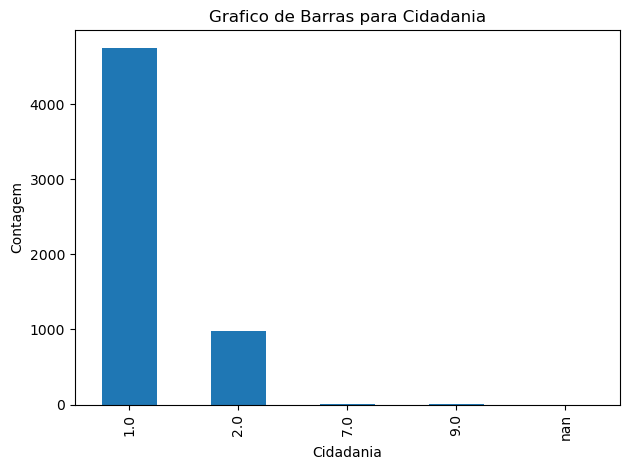

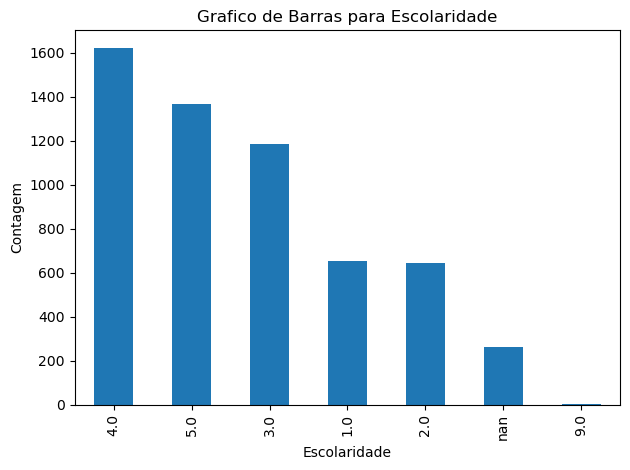

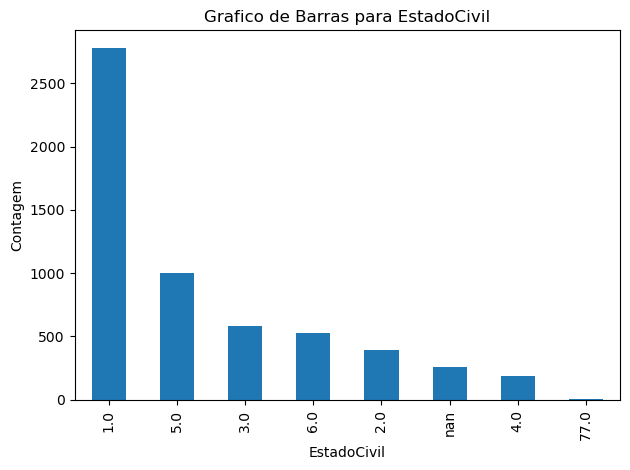

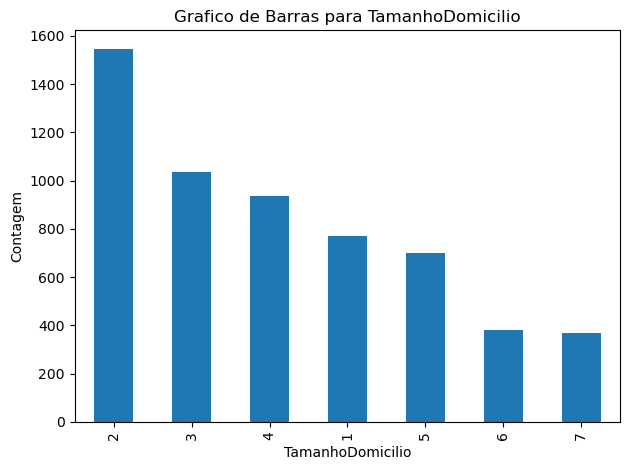

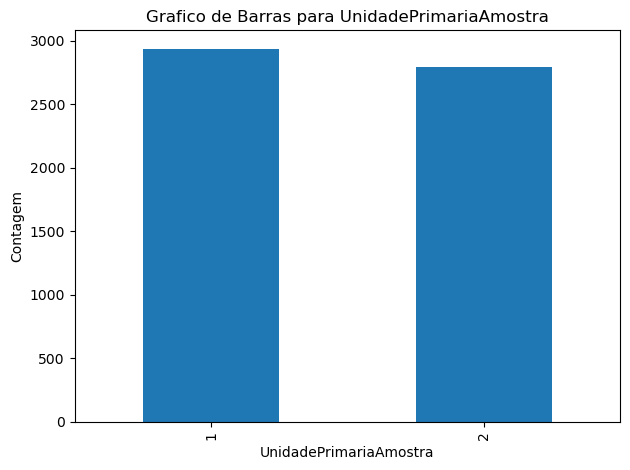

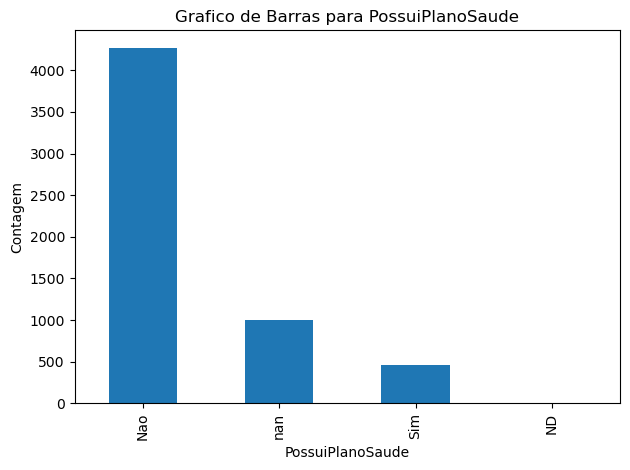

In [14]:
# gráficos das distribuições categóricas
for col in cat_cols:
    
    vc = df_labeled[col].value_counts(dropna=False)
    
    # gráficos de barras
    plt.figure()
    vc.plot(kind='bar')
    plt.title(f"Grafico de Barras para {col}")
    plt.xlabel(col)
    plt.ylabel("Contagem")
    plt.tight_layout()
    plt.show()

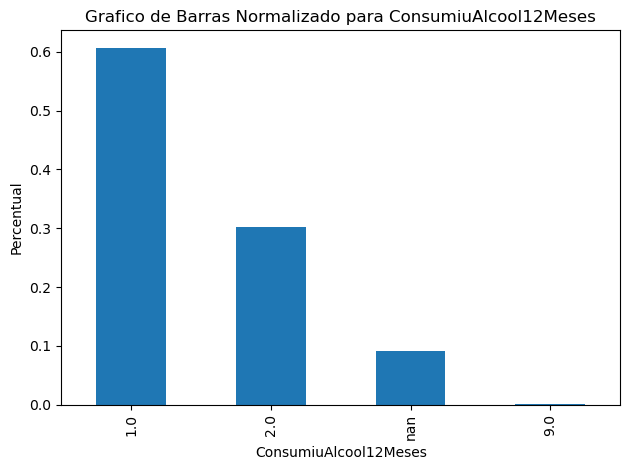

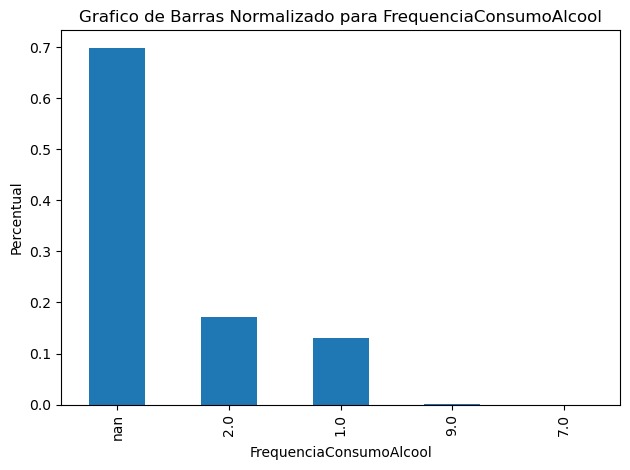

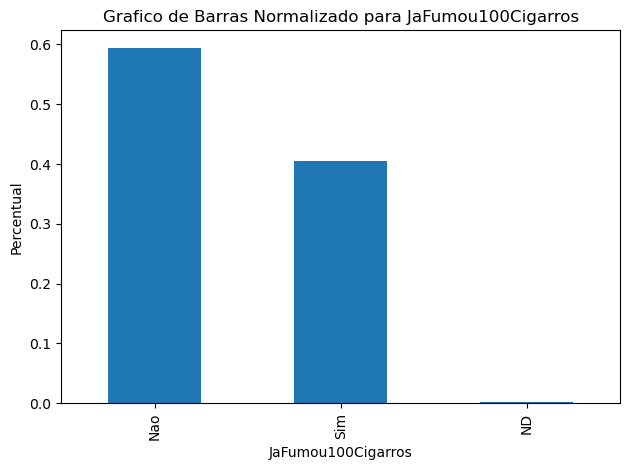

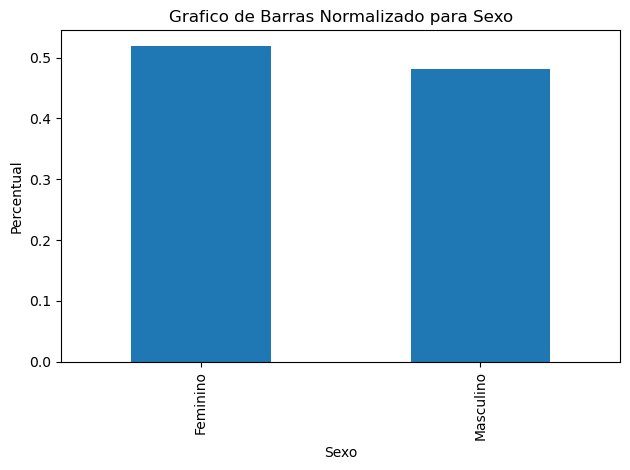

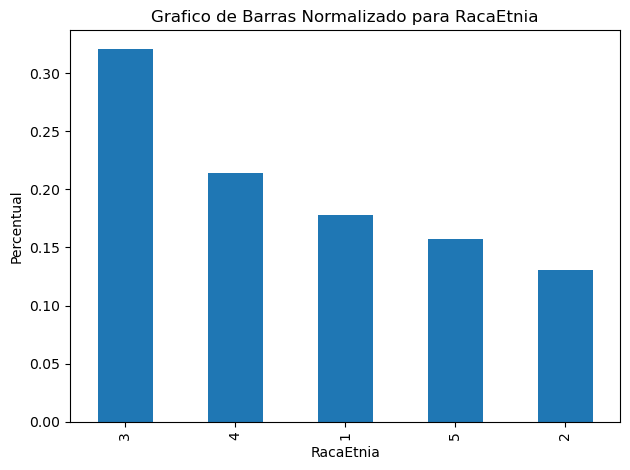

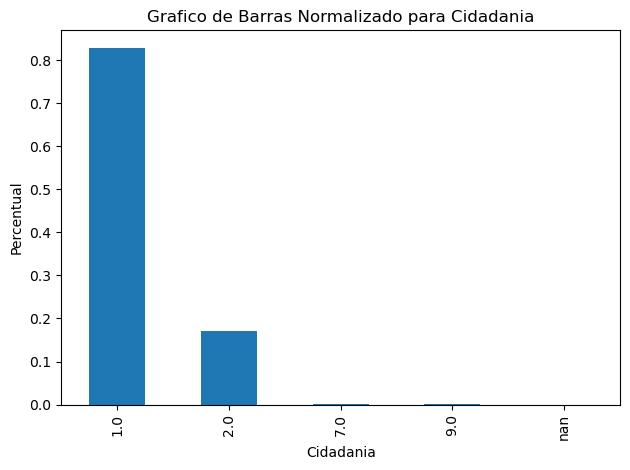

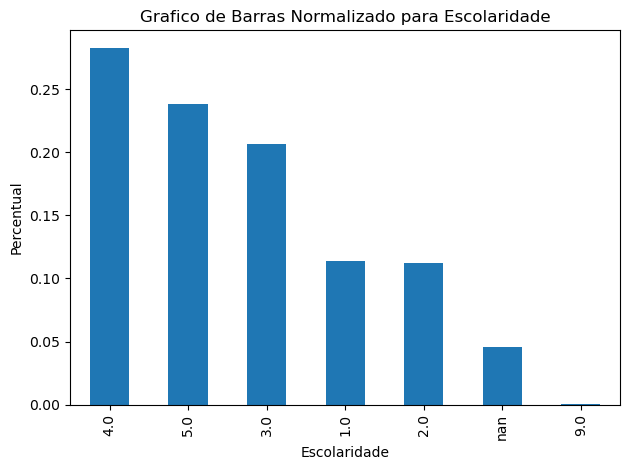

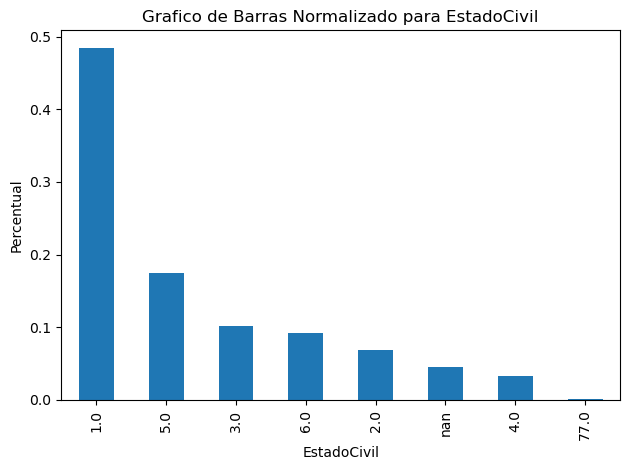

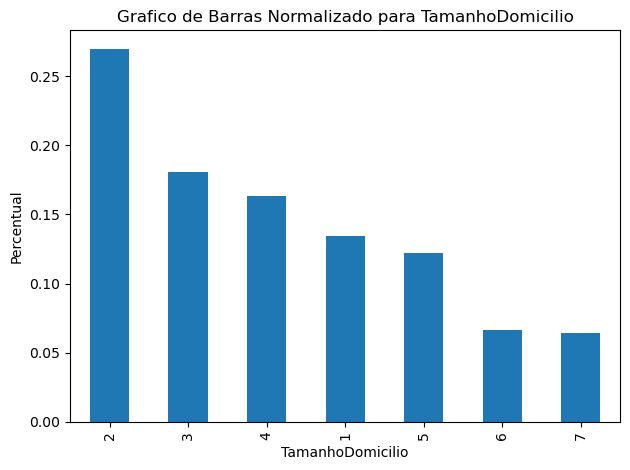

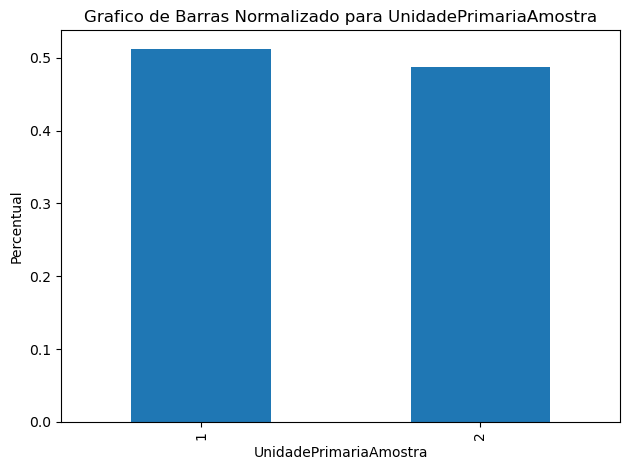

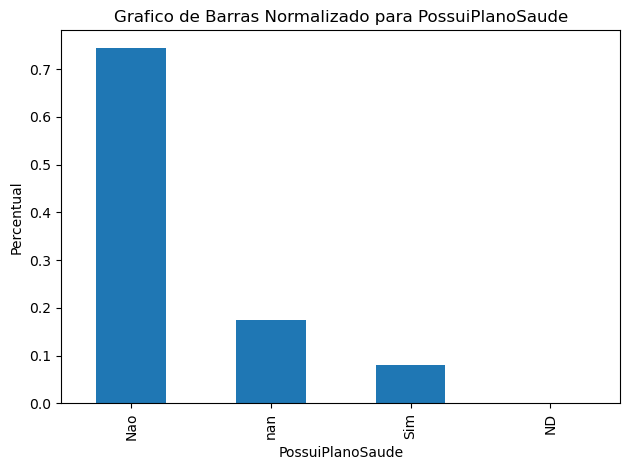

In [15]:
# gráficos das distribuições categóricas
for col in cat_cols:
    
    vc = df_labeled[col].value_counts(dropna=False)

    # gráfico de barras normalizado
    plt.figure()
    (vc/vc.sum()).plot(kind='bar')
    plt.title(f"Grafico de Barras Normalizado para {col}")
    plt.xlabel(col)
    plt.ylabel("Percentual")
    plt.tight_layout()
    plt.show()

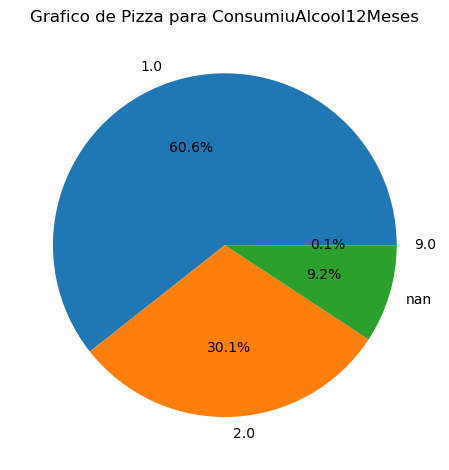

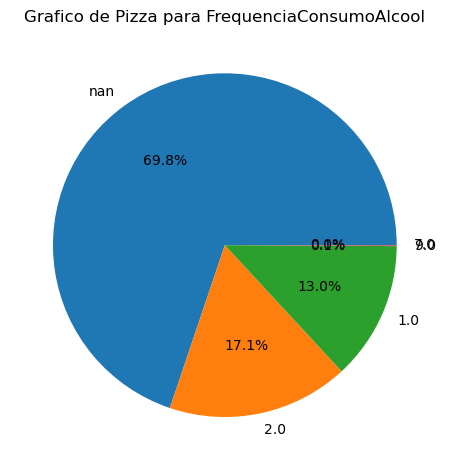

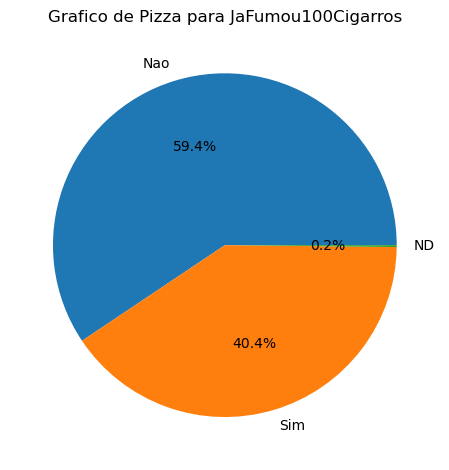

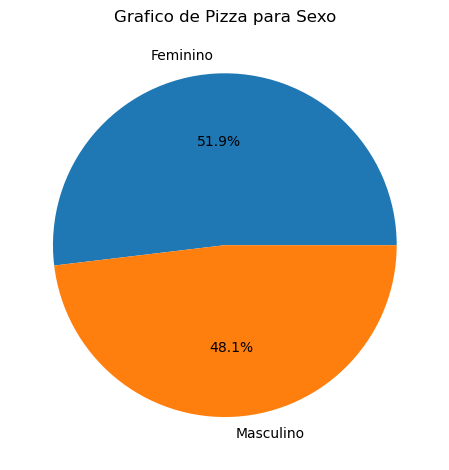

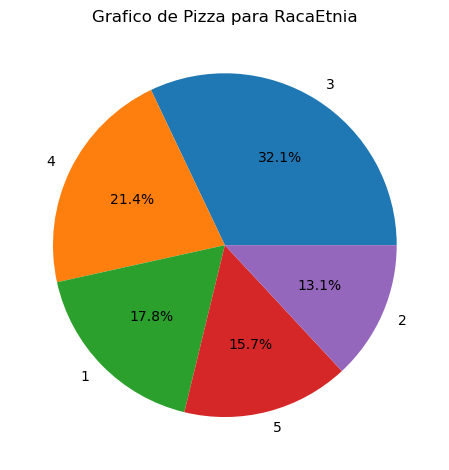

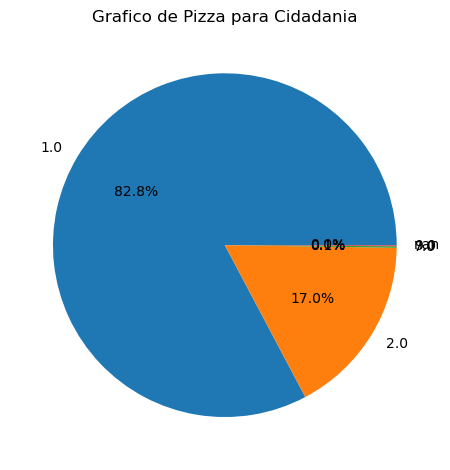

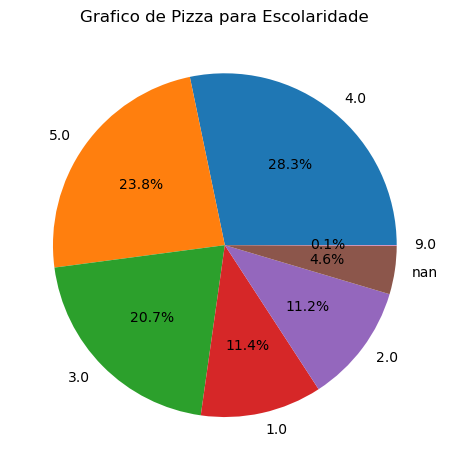

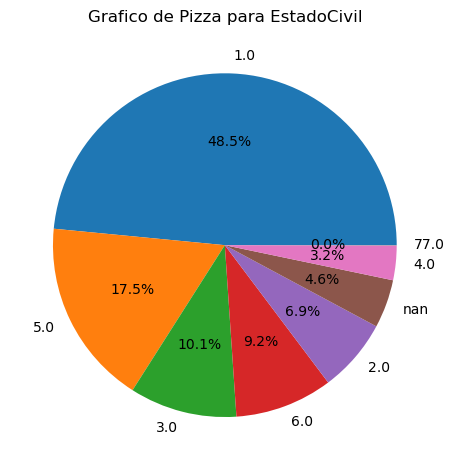

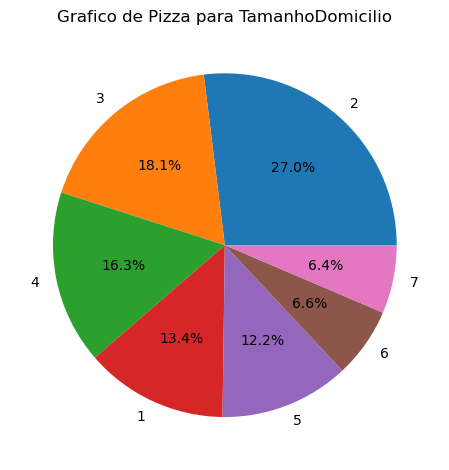

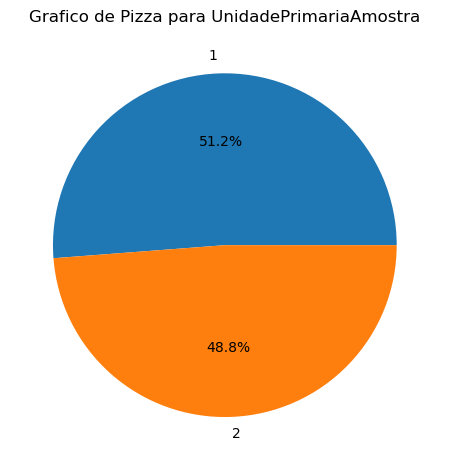

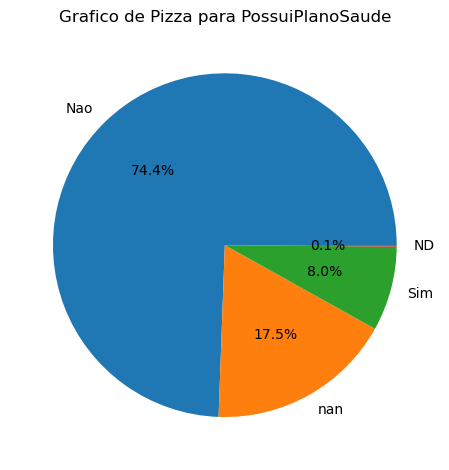

In [16]:
# gráficos das distribuições categóricas
for col in cat_cols:
    
    vc = df_labeled[col].value_counts(dropna=False)    
   
    # gráfico de pizza
    plt.figure()
    vc.plot(kind='pie', autopct='%1.1f%%')
    plt.title(f"Grafico de Pizza para {col}")
    plt.ylabel("")
    plt.tight_layout()
    plt.show()

In [17]:
print(f"Target - IMC: {target}")

Target - IMC: IMC


In [18]:
# impacto: média do IMC por categoria
impact = {}

for col in cat_cols:
    impact[col] = df_labeled.groupby(col)[target].mean()

impact

{'ConsumiuAlcool12Meses': ConsumiuAlcool12Meses
 1.0    29.358653
 2.0    29.742312
 9.0    29.633333
 Name: IMC, dtype: float64,
 'FrequenciaConsumoAlcool': FrequenciaConsumoAlcool
 1.0    30.548103
 2.0    29.109129
 7.0    33.900000
 9.0    32.550000
 Name: IMC, dtype: float64,
 'JaFumou100Cigarros': JaFumou100Cigarros
 ND     29.100000
 Nao    29.241384
 Sim    29.590770
 Name: IMC, dtype: float64,
 'Sexo': Sexo
 Feminino     29.939946
 Masculino    28.778072
 Name: IMC, dtype: float64,
 'RacaEtnia': RacaEtnia
 1    30.965900
 2    29.928150
 3    29.199559
 4    30.399751
 5    26.152125
 Name: IMC, dtype: float64,
 'Cidadania': Cidadania
 1.0    29.686227
 2.0    27.925336
 7.0    29.033333
 9.0    26.460000
 Name: IMC, dtype: float64,
 'Escolaridade': Escolaridade
 1.0    29.612868
 2.0    29.708703
 3.0    29.963567
 4.0    30.270787
 5.0    28.200000
 9.0    29.866667
 Name: IMC, dtype: float64,
 'EstadoCivil': EstadoCivil
 1.0     29.540181
 2.0     29.579793
 3.0     30.3161

In [20]:
cat_cols = [c for c in df.columns if df[c].dtype=='object' or df[c].nunique()<10]

label_maps = {
            "Sexo": {1:"Masc",2:"Fem"},
            "JaFumou100Cigarros": {1:"Sim",2:"Nao",7:"ND",9:"ND"},
            "PossuiPlanoSaude": {1:"Sim",2:"Nao",9:"ND"},
            }

df_labeled = df.copy()

for col, mp in label_maps.items():
    if col in df_labeled:
        df_labeled[col] = df_labeled[col].map(mp)

#Variavel Target
target="IMC"

results={}
for col in cat_cols:
    vc = df_labeled[col].value_counts(dropna=False)
    results[col] = {
        "contagem": vc.to_dict(),
        "normalizados": (vc/vc.sum()).to_dict()
    }

impact = {}
for col in cat_cols:
    impact[col] = df_labeled.groupby(col)[target].mean().to_dict()

results, impact

({'ConsumiuAlcool12Meses': {'contagem': {1.0: 3477,
    2.0: 1728,
    nan: 527,
    9.0: 3},
   'normalizados': {1.0: 0.6062772449869224,
    2.0: 0.3013077593722755,
    nan: 0.0918918918918919,
    9.0: 0.0005231037489102005}},
  'FrequenciaConsumoAlcool': {'contagem': {nan: 4004,
    2.0: 979,
    1.0: 747,
    9.0: 4,
    7.0: 1},
   'normalizados': {nan: 0.6981691368788143,
    2.0: 0.17070619006102877,
    1.0: 0.13025283347863992,
    9.0: 0.0006974716652136007,
    7.0: 0.0001743679163034002}},
  'JaFumou100Cigarros': {'contagem': {'Nao': 3406, 'Sim': 2319, 'ND': 10},
   'normalizados': {'Nao': 0.593897122929381,
    'Sim': 0.404359197907585,
    'ND': 0.0017436791630340018}},
  'Sexo': {'contagem': {'Fem': 2976, 'Masc': 2759},
   'normalizados': {'Fem': 0.518918918918919, 'Masc': 0.4810810810810811}},
  'RacaEtnia': {'contagem': {3: 1839, 4: 1227, 1: 1018, 5: 901, 2: 750},
   'normalizados': {3: 0.3206625980819529,
    4: 0.21394943330427202,
    1: 0.17750653879686137,
    5

In [21]:
# Escolha as duas variáveis categóricas para a tabela de contingência
var1 = "JaFumou100Cigarros"      # Já fumou 100 cigarros?
var2 = "Sexo"    # Sexo

# Criar tabela de contingência
tabela_contingencia = pd.crosstab(df[var1], df[var2])

# Exibir
print("Tabela de Contingência entre", var1, "e", var2, ":\n")
print(tabela_contingencia)

Tabela de Contingência entre JaFumou100Cigarros e Sexo :

Sexo                   1     2
JaFumou100Cigarros            
1                   1413   906
2                   1340  2066
7                      2     0
9                      4     4


In [22]:
# Tabela de contingência entre sexo (RIAGENDR) e hábito de fumar (SMQ020)
tabela1 = pd.crosstab(df["Sexo"], df["JaFumou100Cigarros"])
print(tabela1)

JaFumou100Cigarros     1     2  7  9
Sexo                                
1                   1413  1340  2  4
2                    906  2066  0  4


In [23]:
# Tabela de contingência entre sexo (RIAGENDR) e plano de saúde (HIQ210)
tabela2 = pd.crosstab(df["Idade"], df["PossuiPlanoSaude"])
print(tabela2)

PossuiPlanoSaude  1.0  2.0  9.0
Idade                          
18                  2  107    2
19                 17   67    1
20                 11   51    0
21                  4   37    0
22                 15   55    0
...               ...  ...  ...
76                  0   42    0
77                  0   43    0
78                  1   45    0
79                  0   33    0
80                  9  329    0

[63 rows x 3 columns]


In [24]:
# Tabela de contingência entre etnia (RIDRETH1) e álcool no último ano (ALQ101)
tabela3 = pd.crosstab(df["RacaEtnia"], df["ConsumiuAlcool12Meses"])
print(tabela3)

ConsumiuAlcool12Meses   1.0  2.0  9.0
RacaEtnia                            
1                       582  362    0
2                       423  248    0
3                      1340  394    2
4                       724  385    1
5                       408  339    0


In [25]:
# Tabela de contingência entre plano de saúde (HIQ210) e tabagismo histórico (SMQ020)
tabela4 = pd.crosstab(df["PossuiPlanoSaude"], df["JaFumou100Cigarros"])
print(tabela4)

JaFumou100Cigarros     1     2  7  9
PossuiPlanoSaude                    
1.0                  186   270  0  0
2.0                 1693  2566  1  8
9.0                    2     6  0  0


In [26]:
# Tabela de contingência entre escolaridade (DMDEDUC2) e estado civil (DMDMARTL)
tabela5 = pd.crosstab(df["Escolaridade"], df["EstadoCivil"])
print(tabela5)

EstadoCivil   1.0   2.0   3.0   4.0   5.0   6.0   77.0
Escolaridade                                          
1.0            341    88    52    43    65    66     0
2.0            305    40    62    39   117    80     0
3.0            550    99   127    40   237   133     0
4.0            757   108   217    42   332   163     2
5.0            827    59   120    22   253    85     0
9.0              0     2     1     0     0     0     0


### FIM